In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Task 1 : Exploratory Data Analysis (EDA):

In [6]:
df= pd.read_csv('wine.csv')

In [7]:
df.head(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [8]:
df.info

<bound method DataFrame.info of      Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids 

In [9]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [12]:
# 2. Distribution features using histogram and boxplots

## Histogram

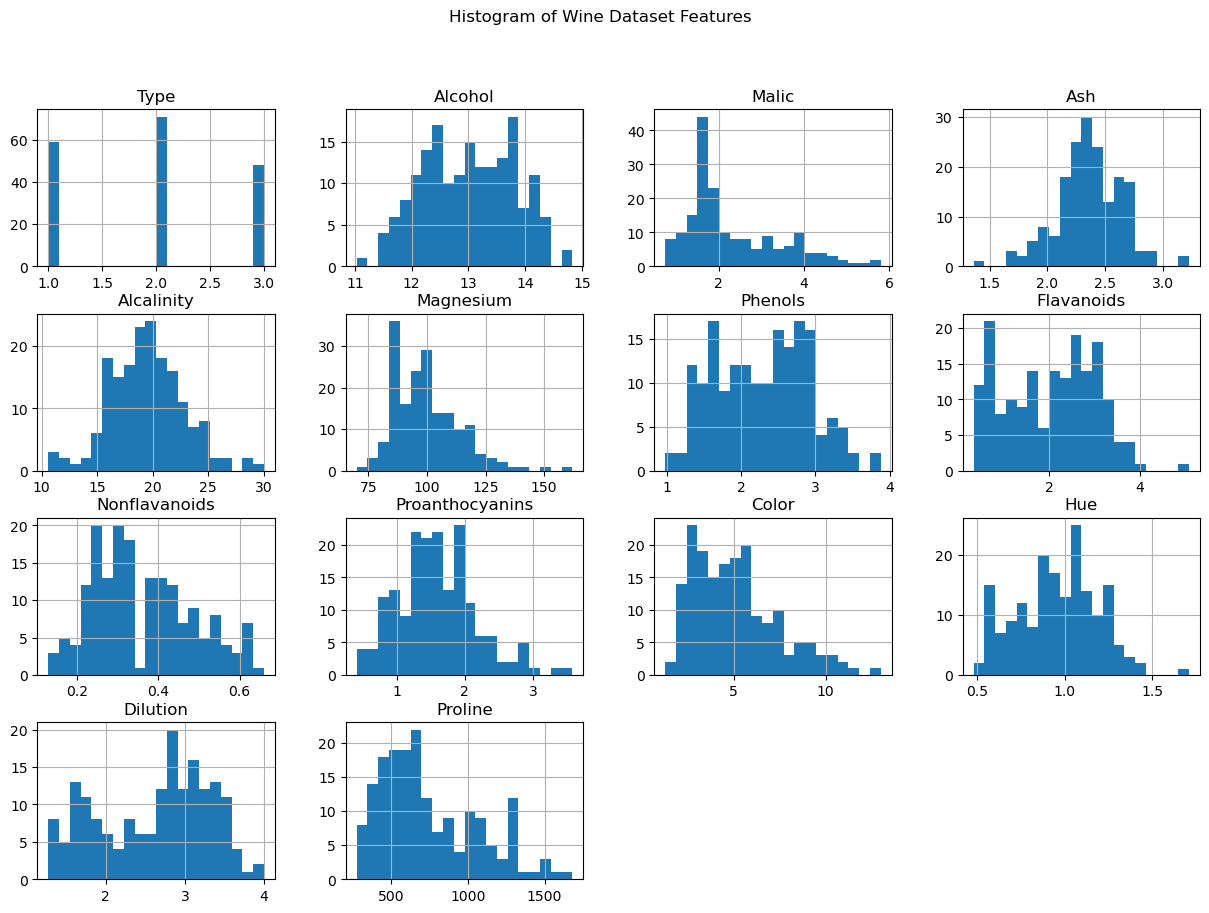

In [22]:
df.hist(bins=20,figsize=(15,10),layout=(4,4))
plt.suptitle('Histogram of Wine Dataset Features')
plt.show()

## Boxplots

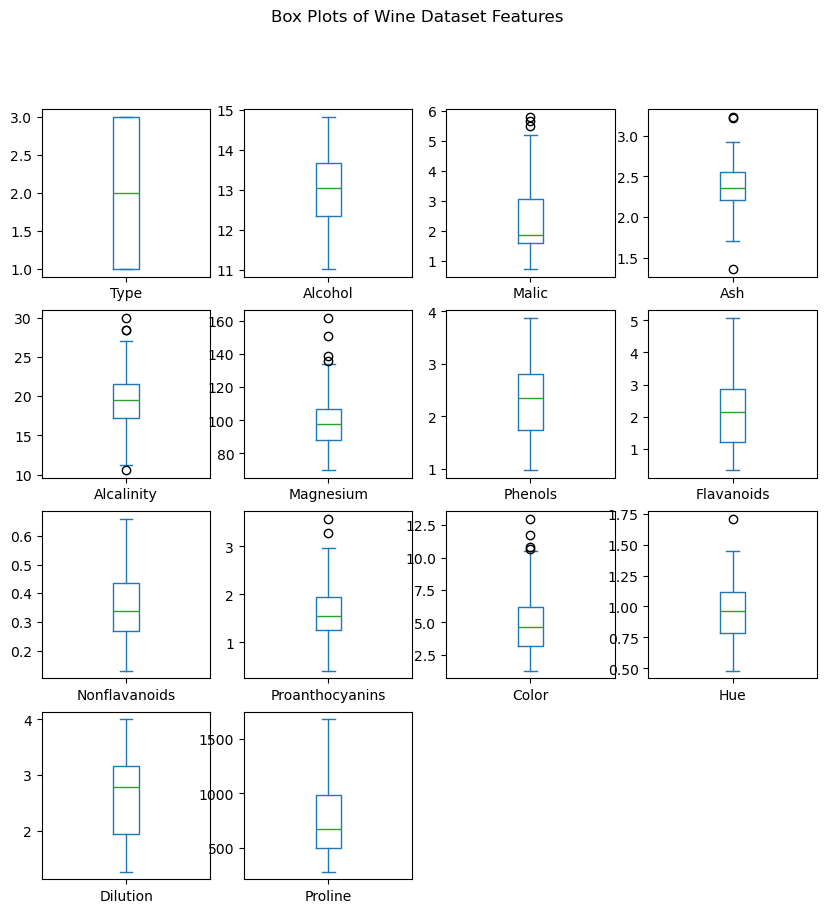

In [24]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,10))
plt.suptitle('Box Plots of Wine Dataset Features')
plt.show()

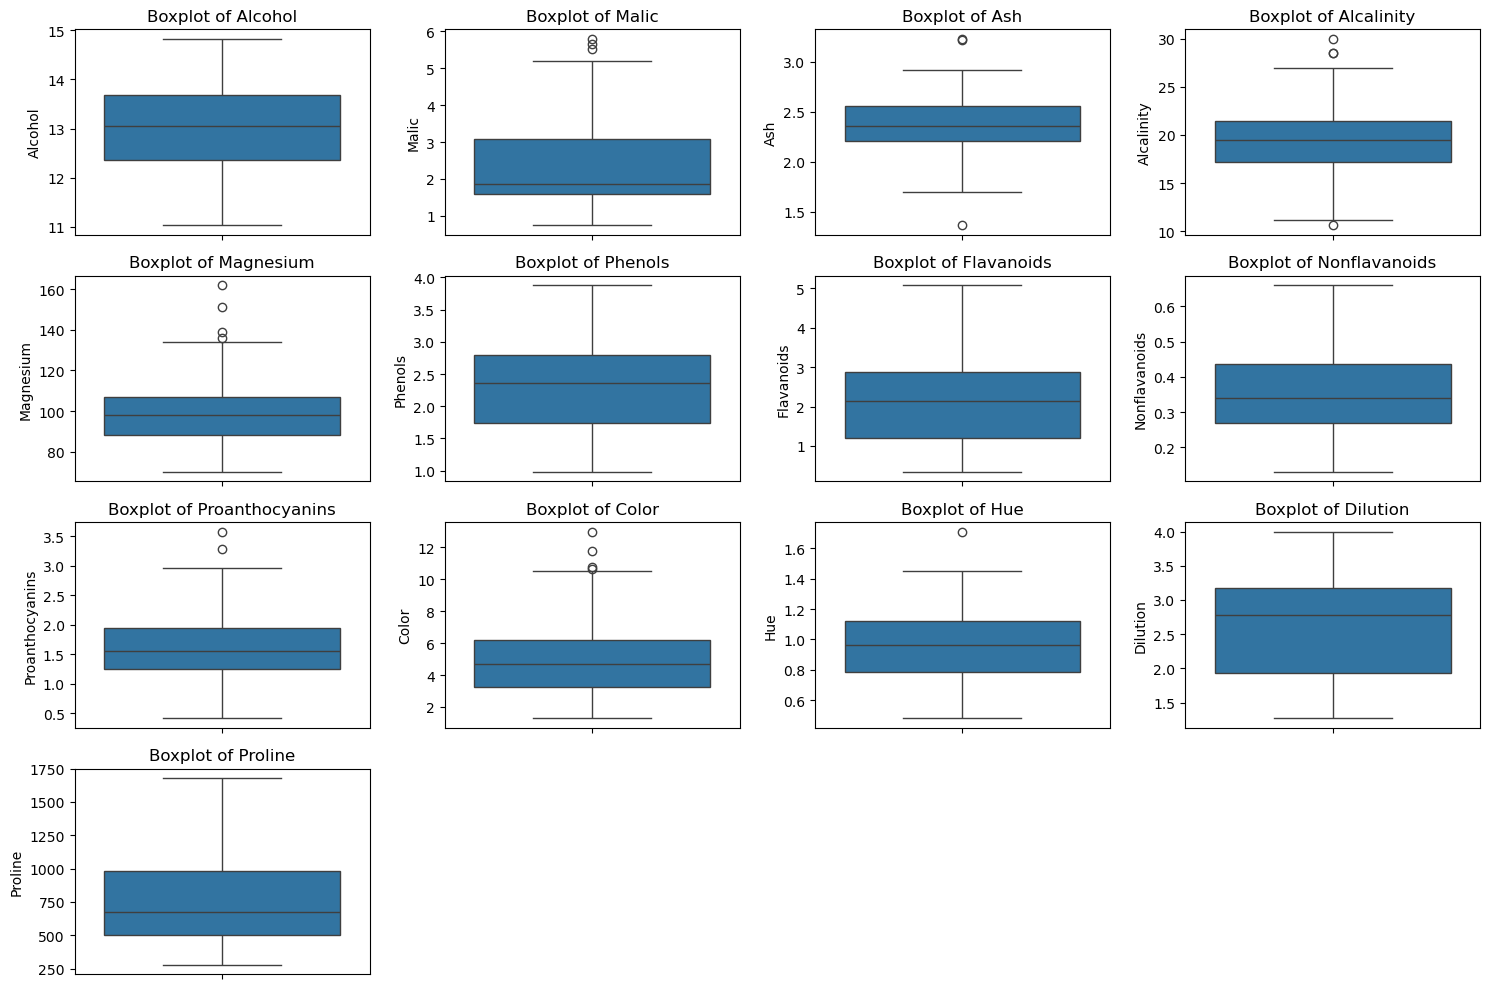

In [25]:
# Another way for boxplot
plt.figure(figsize=(15, 10))

# Loop through each feature (excluding 'Type' as it's a categorical column)
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(4, 4, i)  # Adjust the layout if needed (4x4 for 13 features)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

## Density Plot

In [27]:
# sns.kdeplot() generates a Kernel Density Estimate (KDE) plot for each feature

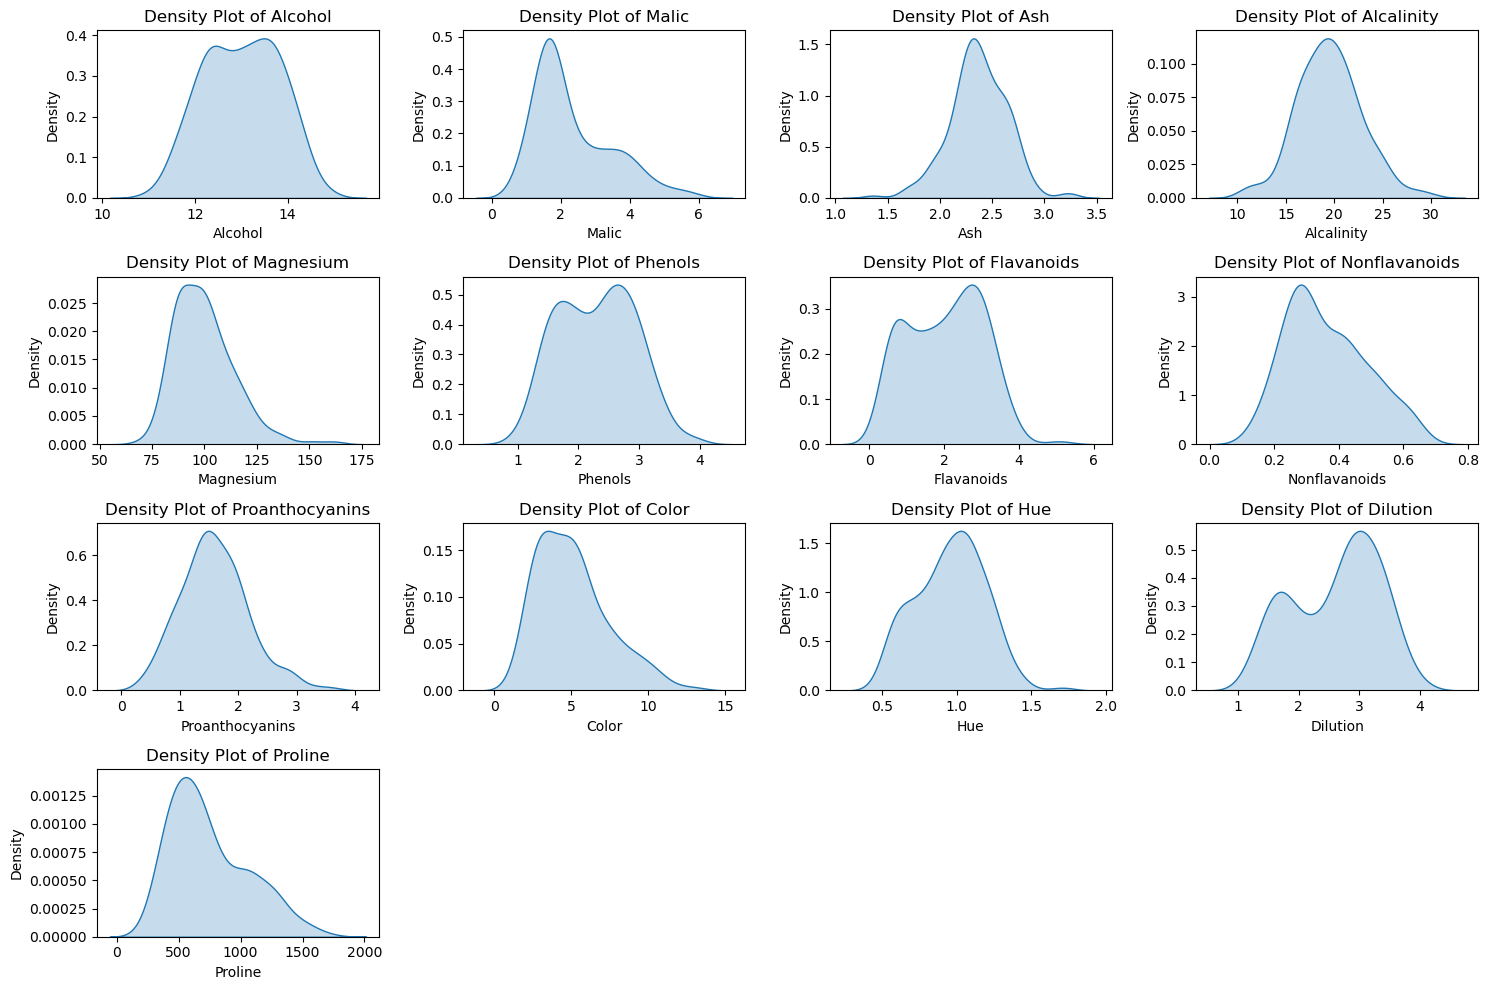

In [29]:
plt.figure(figsize=(15, 10))

# Loop through each feature (excluding 'Type' as it's a categorical column)
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(4, 4, i)  # Adjust the layout (4x4 grid for 13 features)
    sns.kdeplot(df[column], shade=True)
    plt.title(f'Density Plot of {column}')

plt.tight_layout()
plt.show()

In [30]:
# 3.Investigate correlations between features to understand relationships within the data.

In [31]:
correlation_matrix= df.corr()
correlation_matrix

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


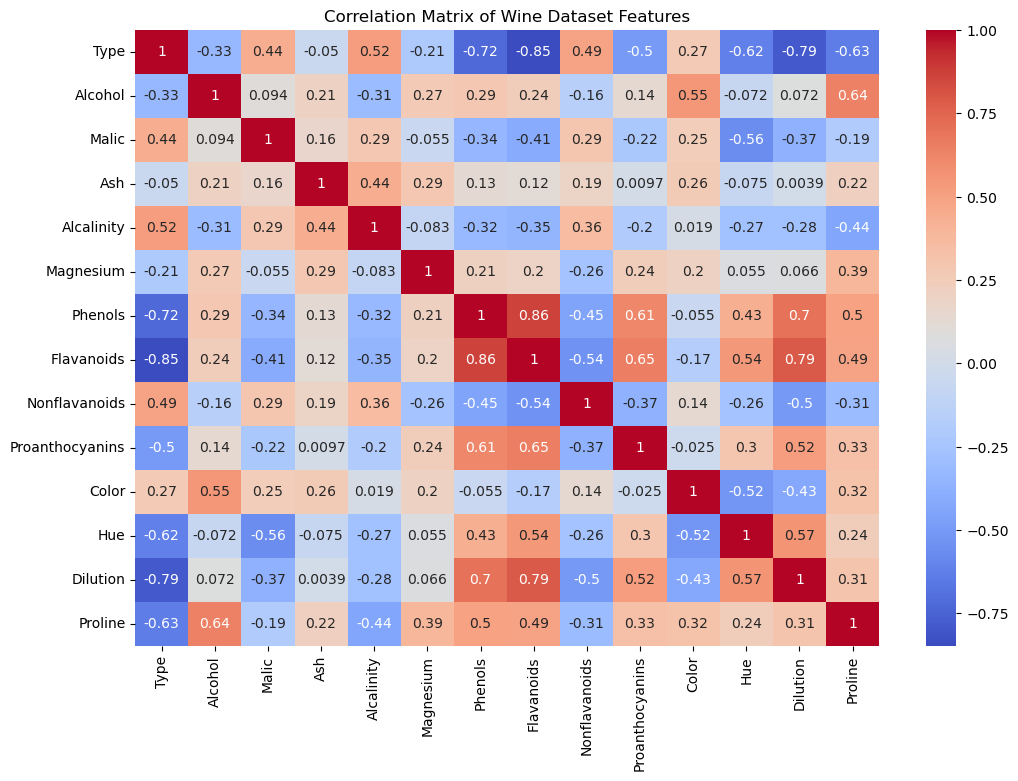

In [32]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Wine Dataset Features")
plt.show()

# Task 2: Dimensionality Reduction with PCA:

In [35]:
# 1.Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

In [36]:
features= df.drop(columns=['Type'])
target=df[['Type']]

In [37]:
#  Standardize the features

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler= StandardScaler()

In [42]:
scaled_features= scaler.fit_transform(features)
scaled_features

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [43]:
# 2.Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance

In [47]:
#  Apply PCA

In [48]:
pca= PCA(n_components=6)

In [59]:
pca.fit(scaled_features)

PCA(n_components=6)

In [61]:
#Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

In [63]:
explained_variance_ratio

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823])

In [65]:
cumulative_variance

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116])

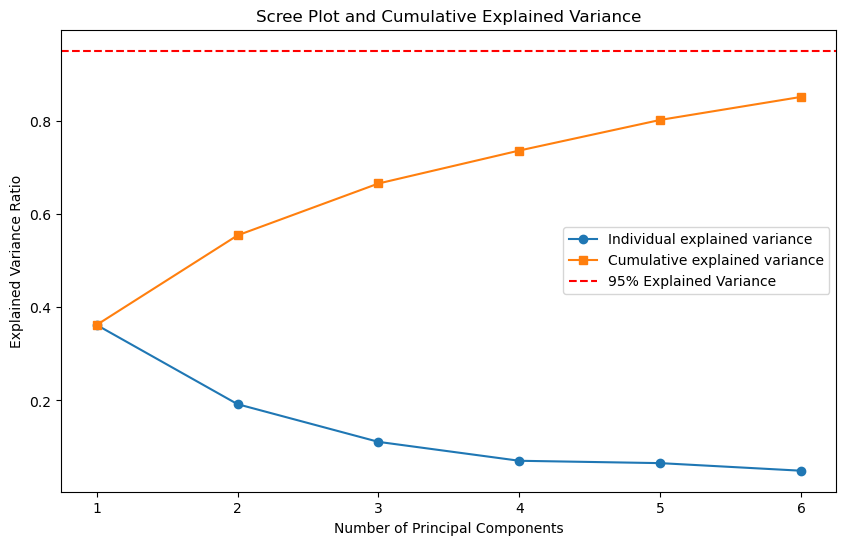

In [67]:
# Plot scree plot and cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.legend()
plt.show()

In [69]:
pca_transformed_data = pca.fit_transform(scaled_features)

In [71]:
# 3.Transfer Original Dataset into Principal Componenet dataset.

In [73]:
pca_transformed_df = pd.DataFrame(pca_transformed_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
pca_transformed_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783


In [75]:
# Add the 'Type' column back for clustering

pca_transformed_df['Type'] = df['Type']

In [77]:
# Display the transformed datset

pca_transformed_df 

,PC1,PC2,PC3,PC4,PC5,PC6,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,1
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,3
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,3
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,3
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,3


In [79]:
# above is transformed dataset

# Task 3: Clustering with Original Data:

In [82]:
#1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.

In [84]:
kmeans= KMeans(n_clusters=3,random_state=50)

In [86]:
kmeans_labels_original=kmeans.fit_predict(scaled_features)
kmeans_labels_original

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [88]:
# visualization with original data

In [90]:
# Visualize clusters for PCA data (using first two components for simplicity)

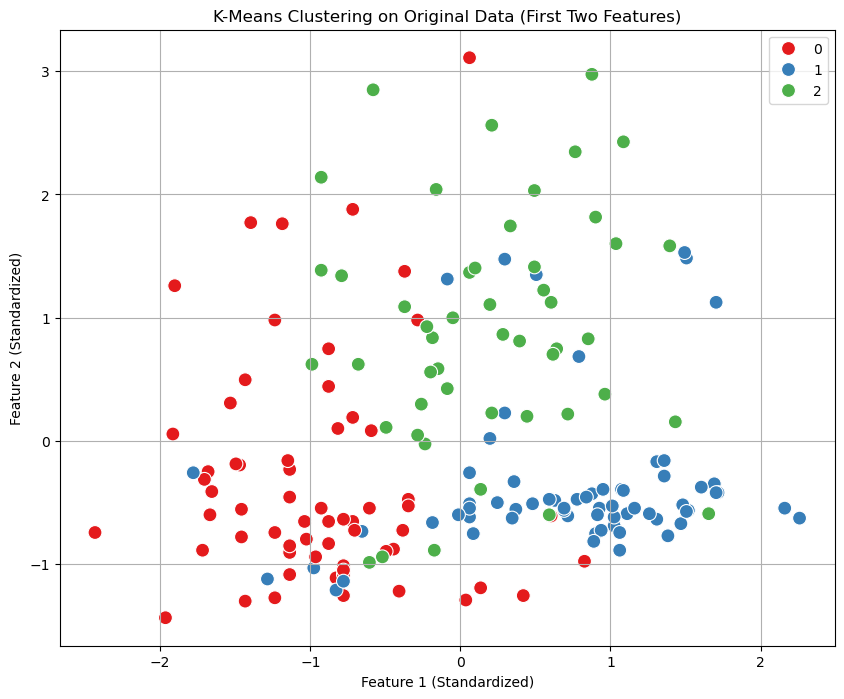

In [92]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=kmeans_labels_original, palette='Set1', s=100)
plt.title('K-Means Clustering on Original Data (First Two Features)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.grid(True)
plt.show()


In [94]:
silhouette_score_origianl=silhouette_score(scaled_features,kmeans_labels_original)
silhouette_score_origianl

0.2806817957373884

In [96]:
davies_bouldin_index_original=davies_bouldin_score(scaled_features,kmeans_labels_original)
davies_bouldin_index_original

1.393136248943783

## Silhouette score or Davies–Bouldin index of original dataset

In [99]:
print(f'Silhouette Score (Original Data): {silhouette_score_origianl}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_index_original}')

Silhouette Score (Original Data): 0.2806817957373884
Davies-Bouldin Index (Original Data): 1.393136248943783


# Task 4: Clustering with PCA Data:

In [102]:
# Apply K-means to the PCA-transformed data

kmeans_pca=KMeans(n_clusters=3,random_state=50)

In [104]:
kmeans_labels_pca=kmeans_pca.fit_predict(pca_transformed_df)
kmeans_labels_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# Elbow Method - To determine optimal k value

In [ ]:
# The Elbow Method is commonly used to determine the optimal number of clusters (k) in K-Means clustering. 

In [139]:
clusters= range(1,11)

In [141]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

In [143]:
inertia

[17592296.383508474,
 4545746.292099379,
 2625223.1506744237,
 1351749.369142808,
 1031258.3933386389,
 647326.0020260846,
 414997.5629249221,
 395738.6023371984,
 309383.95581736247,
 229202.7637764259]

Text(0.5, 1.0, 'Elbow Method to Determine optimal K')

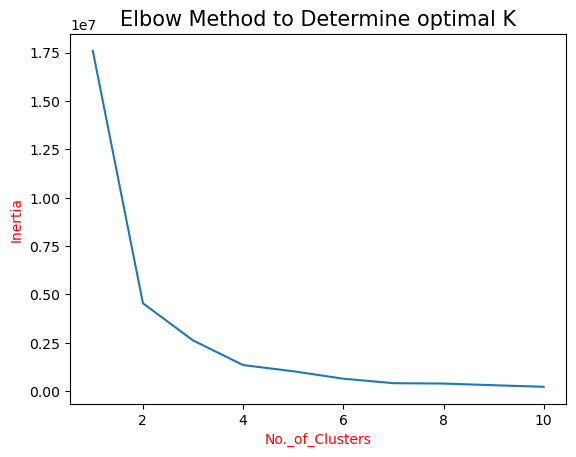

In [151]:
#matplotlib imported already
plt.plot(clusters,inertia)
plt.xlabel('No._of_Clusters',size=10,color='r')
plt.ylabel('Inertia',size=10,color='r')
plt.title('Elbow Method to Determine optimal K',size=15,color='black')

# Visualization

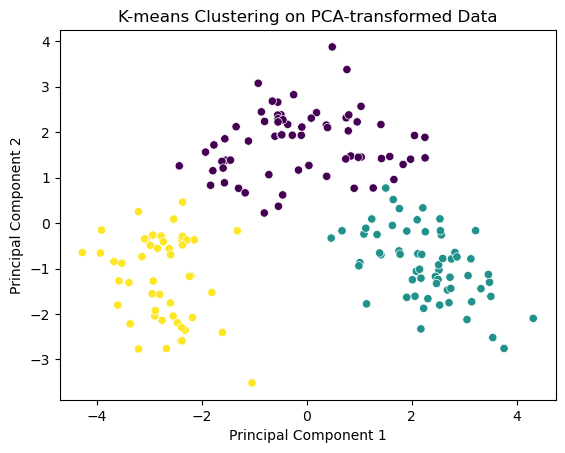

In [158]:
# Visualize clusters for PCA data (using first two components for simplicity)
sns.scatterplot(x=pca_transformed_data[:, 0],y= pca_transformed_data[:, 1], c=kmeans_labels_pca ,cmap='viridis')
plt.title('K-means Clustering on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [163]:
# silhoette score and davis bouldin score

In [112]:
silhouette_score_pca=silhouette_score(pca_transformed_data,kmeans_labels_pca)
silhouette_score_pca

0.34556668187738415

In [114]:
davies_bouldin_index_pca=davies_bouldin_score(pca_transformed_data,kmeans_labels_pca)
davies_bouldin_index_pca

1.1555049642612

## Silhouette score or Davies–Bouldin index of PCA dataset

In [117]:
print(f'Silhouette Score (PCA Data): {silhouette_score_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_index_pca}')

Silhouette Score (PCA Data): 0.34556668187738415
Davies-Bouldin Index (PCA Data): 1.1555049642612


# Task 5: Comparison and Analysis

## Original data

## PCA Transformed Data

## Similarities and Differences:

## Reflect on the impact of dimensionality reduction on clustering performance.

## Trade-offs Between PCA and Clustering Directly on the Original Dataset:

# Task 6: Conclusion and Insights

# ---- The End----